In [39]:
import matplotlib.pyplot as mtp
import pandas as pd
import seaborn as sns

In [40]:
df = pd.read_csv(r"C:\Users\91771\Downloads\archive\Iris.csv")

In [41]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [43]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot: >

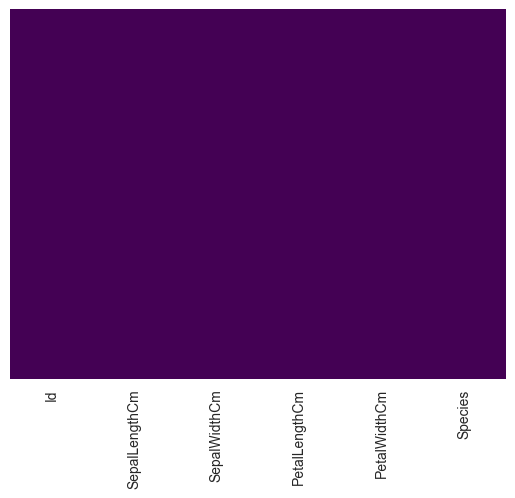

In [44]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
df.corr()

C:\Users\91771\AppData\Local\Temp\ipykernel_22536\1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


C:\Users\91771\AppData\Local\Temp\ipykernel_22536\1072140413.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

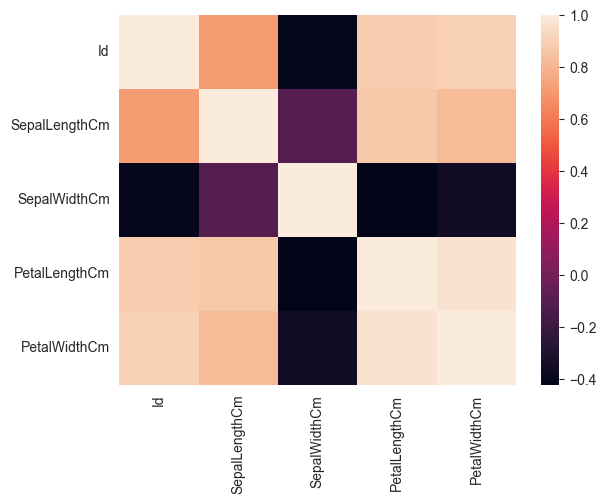

In [46]:
sns.heatmap(df.corr())

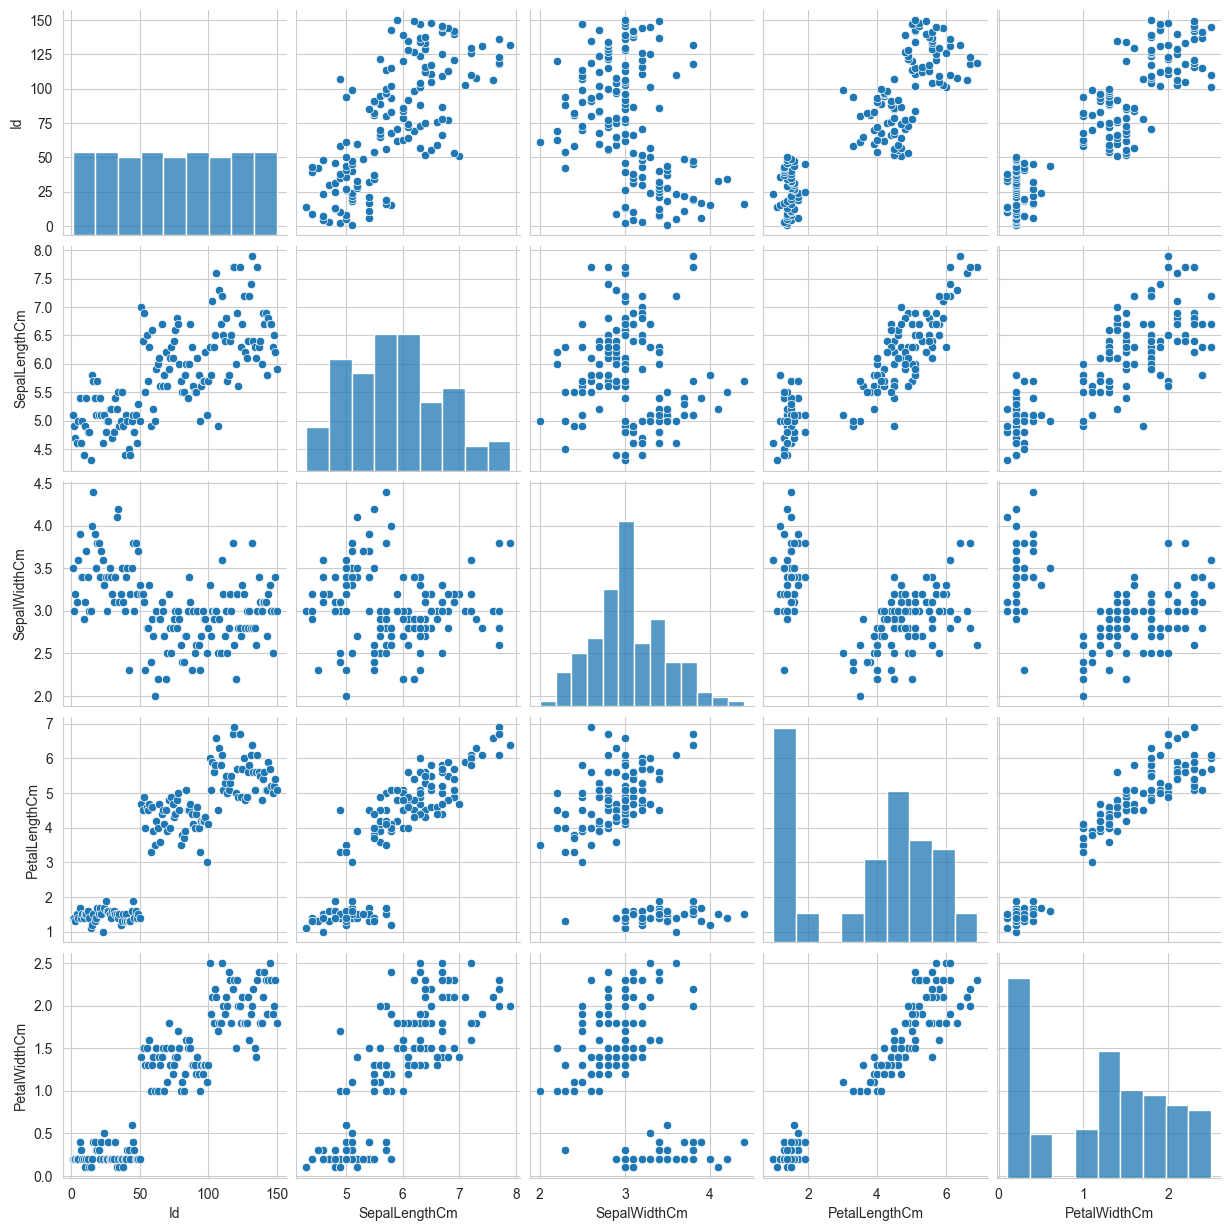

In [47]:
sns.pairplot(df)

C:\Users\91771\venv\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\91771\venv\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\91771\venv\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


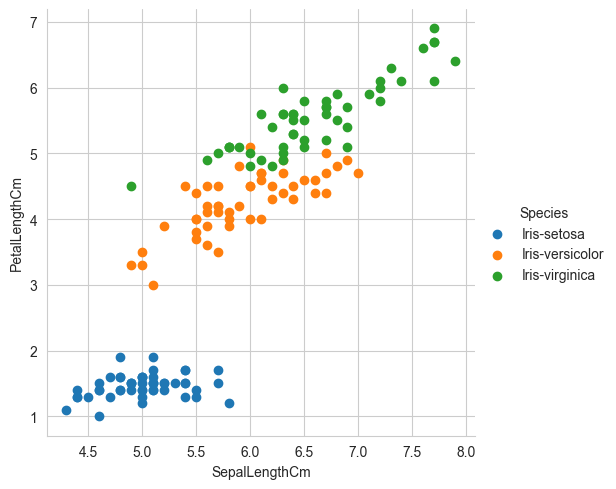

In [48]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Species", height= 5).map(mtp.scatter,'SepalLengthCm','PetalLengthCm').add_legend()

In [49]:
x = df.iloc[:,:4].values
y = df['Species'].values
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [50]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [51]:
y_pred = classifier.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'],
      dtype='<U15')

In [52]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
print("Accuracy :", accuracy_score(y_test,y_pred))
con_mat

Accuracy : 1.0


array([[ 8,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 12]], dtype=int64)

In [53]:
print('Accuracy score of Gaussian Naive Base classifier on training set: {:,2f}',format(classifier.score(x_train,y_train)))
print('Accuracy score of Gaussian Naive Base classifier on test set: {:,2f}',format(classifier.score(x_test,y_test)))

Accuracy score of Gaussian Naive Base classifier on training set: {:,2f} 0.9833333333333333
Accuracy score of Gaussian Naive Base classifier on test set: {:,2f} 1.0
